# Final project
Analysis diamonds.csv


# Short information my dataset
### Topic: Diamonds
### Task: LinearRegression analys
### Project aim: Do basic data analysis and use Linear Regression to predict prices

              
This classic dataset contains the prices and other attributes of almost 54,000 diamonds.

             


# 1. Importing the libraries and data

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#import the data
dataset = pd.read_csv('diamonds.csv')


In [5]:
#Show the dataset
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Check null varablies 

In [6]:
dataset.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
# Drop the Unnamed 
dataset.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
#Info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#     Information
1.price price in US dollars (\$326--\$18,823)

2.carat weight of the diamond (0.2--5.01)

3.cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4.color diamond colour, from J (worst) to D (best)

5.clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6.x length in mm (0--10.74)

7.y width in mm (0--58.9)

8.z depth in mm (0--31.8)

dataset.describe()

#  Univariate Variable Analysis
Categorical Variables: ['cut', 'color', 'clarity']

Numerical Variables: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

## Categorical Variables

In [9]:

def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [10]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['cut', 'color', 'clarity']


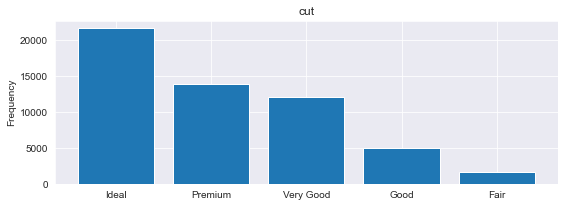

cut:
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


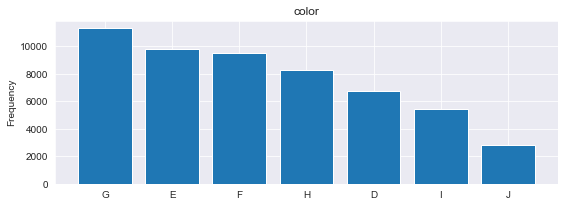

color:
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


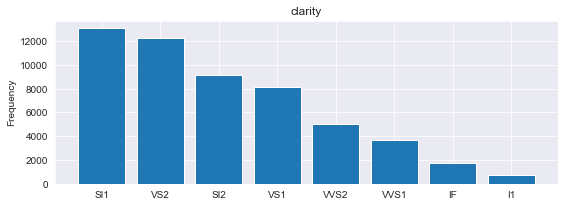

clarity:
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


In [11]:
sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)

## Numerical Variables

In [12]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['carat', 'depth', 'table', 'x', 'y', 'z']


Text(0.5, 1.0, 'depth Interval and Counts')

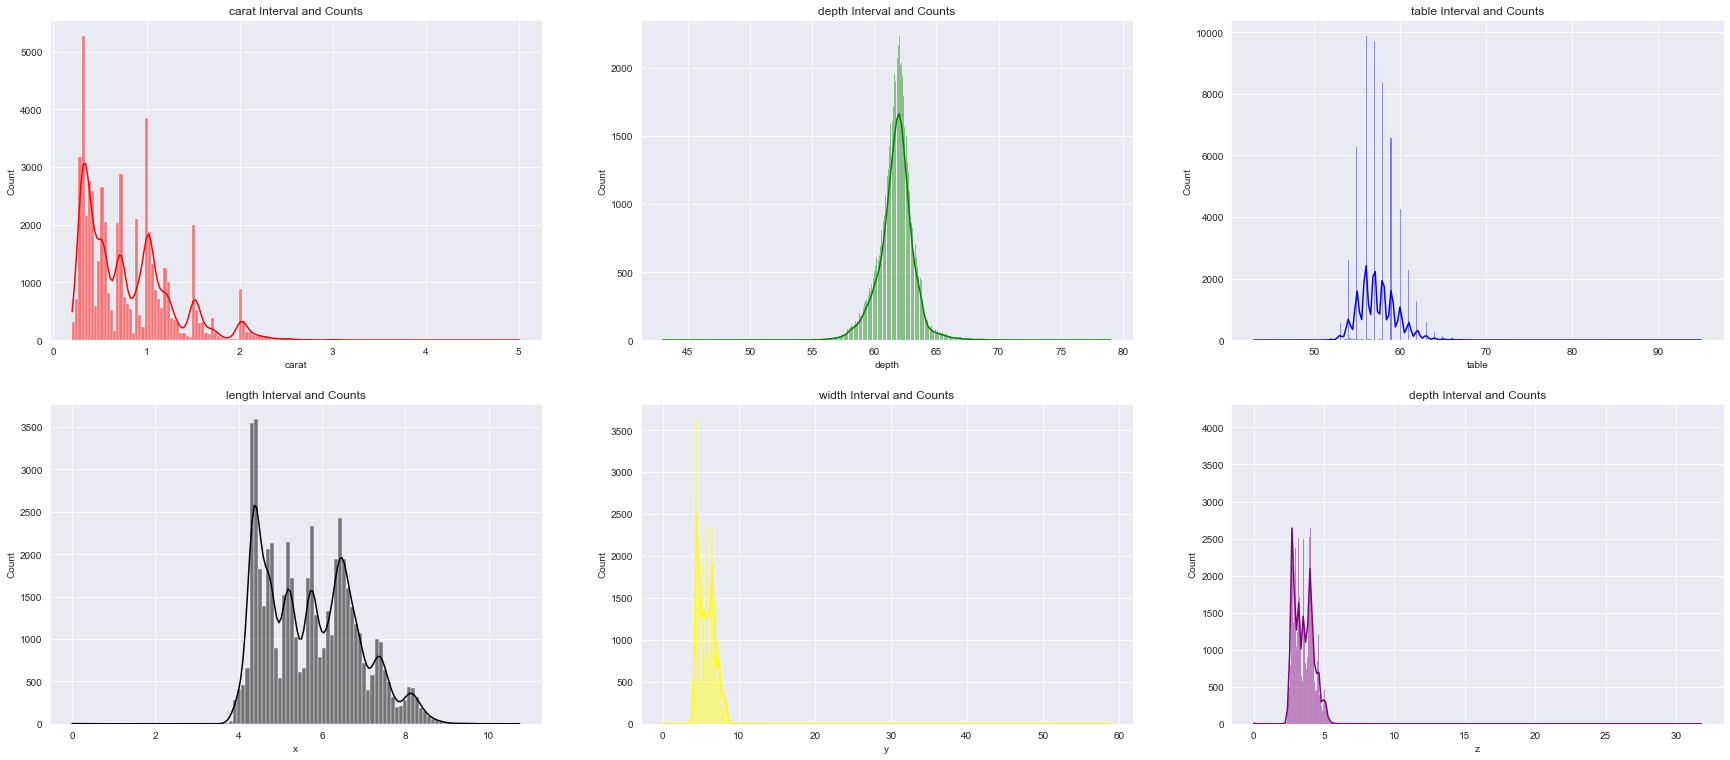

In [13]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
sns.histplot(dataset['carat'], color = 'red', kde = True).set_title('carat Interval and Counts')

plt.subplot(3,3,2)
sns.histplot(dataset['depth'], color = 'green', kde = True).set_title('depth Interval and Counts')

plt.subplot(3,3,3)
sns.histplot(dataset['table'], kde = True, color = 'blue').set_title('table Interval and Counts')

plt.subplot(3,3,4)
sns.histplot(dataset['x'], kde = True, color = 'black').set_title('length Interval and Counts')

plt.subplot(3,3,5)
sns.histplot(dataset['y'], kde = True, color = 'yellow').set_title('width Interval and Counts')

plt.subplot(3,3,6)
sns.histplot(dataset['z'], kde = True, color = 'purple').set_title('depth Interval and Counts')



# Data analysis by cut and price

In [17]:
#Create the new dataset
dataset[["cut","price"]].groupby(["cut"], as_index = False).mean().sort_values(by="price",ascending = False)

,cut,price
3,Premium,4584.257704
0,Fair,4358.757764
4,Very Good,3981.759891
1,Good,3928.864452
2,Ideal,3457.541970


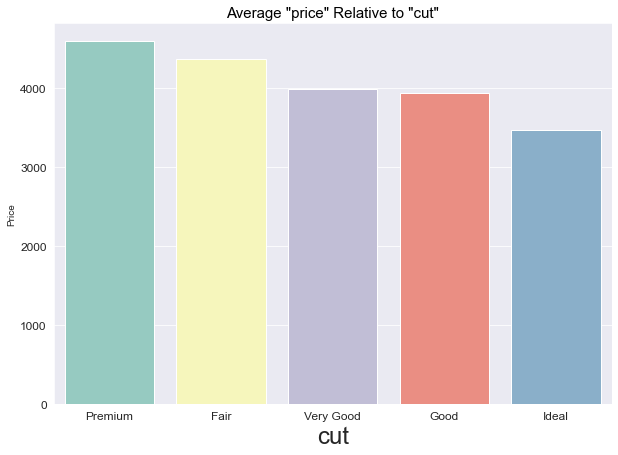

In [18]:
mean_price_by_cut = dataset[["cut","price"]].groupby(["cut"], as_index = False).mean().sort_values(by="price",ascending = False)

#Visualizing
plt.figure(figsize=(10,7))
sns.barplot(x = mean_price_by_cut['cut'], y = mean_price_by_cut['price'], palette="Set3")

plt.ylabel('Price')
plt.xlabel('cut', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "cut"',color = 'black',fontsize=15)
plt.show()

Text(0.5, 1.0, "Distribution of Diamonds by 'cut'")

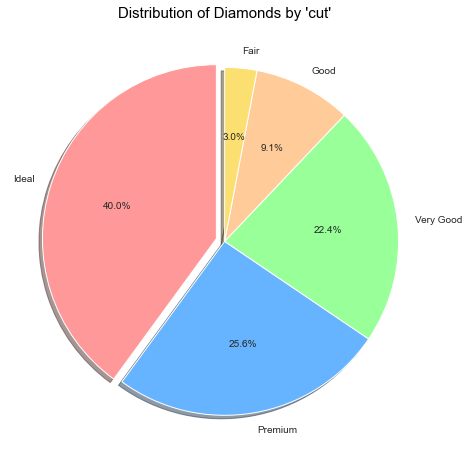

In [19]:
# pie visualizing
labels = dataset['cut'].value_counts().index
sizes = dataset['cut'].value_counts().values
myexplode = [0.05, 0, 0, 0, 0]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70']

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title("Distribution of Diamonds by 'cut'",color = 'black',fontsize = 15)

# Data analysis by color and price¶

In [20]:
#create the new dataset
dataset[["color","price"]].groupby(["color"], as_index = False).mean().sort_values(by="price",ascending = False)

,color,price
6,J,5323.818020
5,I,5091.874954
4,H,4486.669196
3,G,3999.135671
2,F,3724.886397
0,D,3169.954096
1,E,3076.752475


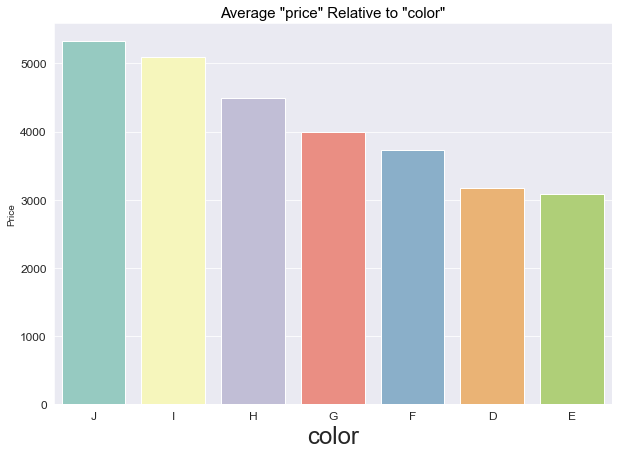

In [21]:
mean_price_by_color = dataset[["color","price"]].groupby(["color"], as_index = False).mean().sort_values(by="price",ascending = False)

plt.figure(figsize=(10,7))
sns.barplot(x = mean_price_by_color['color'], y = mean_price_by_color['price'], palette="Set3")

plt.ylabel('Price')
plt.xlabel('color', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "color"',color = 'black',fontsize=15)
plt.show()

Text(0.5, 1.0, "Distribution of Diamonds by 'color'")

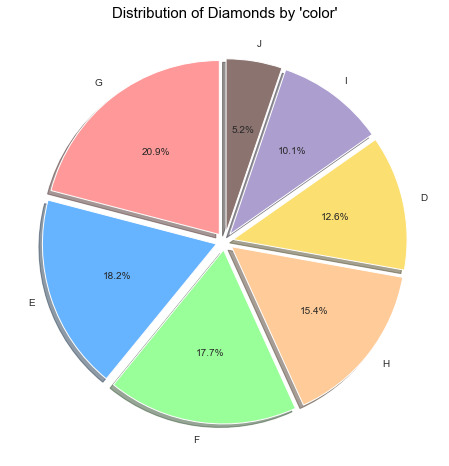

In [22]:
labels = dataset['color'].value_counts().index
sizes = dataset['color'].value_counts().values
myexplode = [0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70','#ac9fd0','#8b7470']

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title("Distribution of Diamonds by 'color'",color = 'black',fontsize = 15)

# Correlation in the DATASET

<AxesSubplot:>

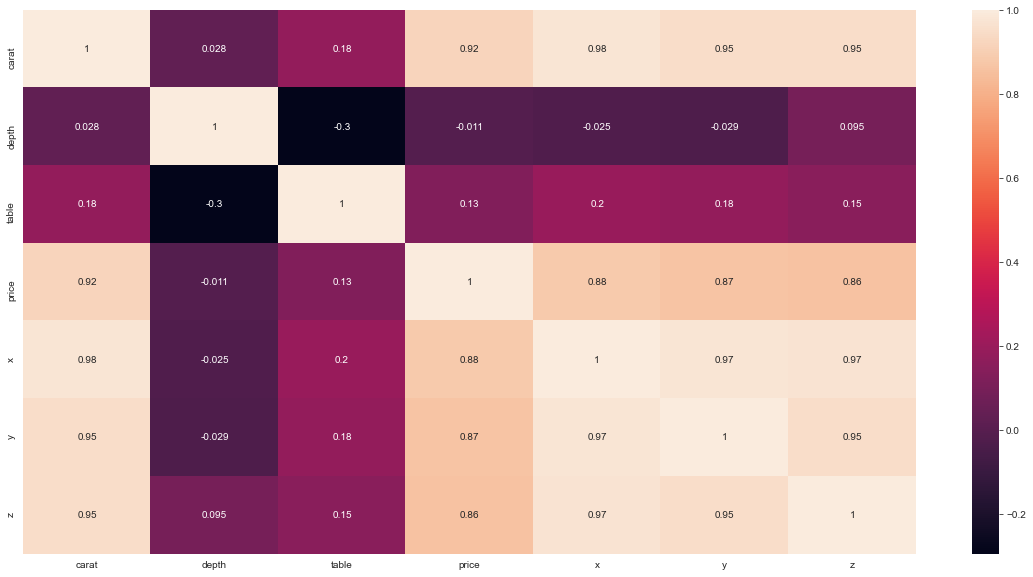

In [23]:
plt.figure(figsize=(20,10))#create fig
sns.heatmap(dataset.corr(),annot=True)#use heatmap find correlation

# Prediction Part
## Classification

## Splitting the dataset into the Training set and Test set

In [56]:
# Create the varable x and y
data = pd.read_csv('diamonds.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)#delete column 


In [57]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Encoding categorical data

In [55]:
data.info()#color and clarity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [58]:
# encode clarity
for i in range(len(data)):
    if data['clarity'].iloc[i] == 'SI1':
        data['clarity'].iloc[i] = 1 
    if data['clarity'].iloc[i] == 'VS2':
        data['clarity'].iloc[i] = 2  
    if data['clarity'].iloc[i] == 'SI2':
        data['clarity'].iloc[i] = 3  
    if data['clarity'].iloc[i] == 'VS1':
        data['clarity'].iloc[i] = 4 
    if data['clarity'].iloc[i] == 'VVS2':
        data['clarity'].iloc[i] = 5  
    if data['clarity'].iloc[i] == 'VVS1':
        data['clarity'].iloc[i] = 6  
    if data['clarity'].iloc[i] == 'IF':
        data['clarity'].iloc[i] = 7  
    if data['clarity'].iloc[i] == 'I1':
        data['clarity'].iloc[i] = 8  
        

C:\Users\kenze\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [59]:
#encode cut value
for i in range(len(data)):
    if data['cut'].iloc[i] == 'Ideal':
        data['cut'].iloc[i] = 1
    if data['cut'].iloc[i] == 'Premium':
        data['cut'].iloc[i] = 2
    if data['cut'].iloc[i] == 'Very Good':
        data['cut'].iloc[i] = 3
    if data['cut'].iloc[i] == 'Good':
        data['cut'].iloc[i] = 4
    if data['cut'].iloc[i] == 'Fair':
        data['cut'].iloc[i] = 5

In [60]:
#encode color
for i in range(len(data)):
    if data['color'].iloc[i] == 'G':
        data['color'].iloc[i] = 1
    if data['color'].iloc[i] == 'E':
        data['color'].iloc[i] = 2
    if data['color'].iloc[i] == 'F':
        data['color'].iloc[i] = 3
    if data['color'].iloc[i] == 'H':
        data['color'].iloc[i] = 4
    if data['color'].iloc[i] == 'D':
        data['color'].iloc[i] = 5       
    if data['color'].iloc[i] == 'I':
        data['color'].iloc[i] = 6
    if data['color'].iloc[i] == 'J':
        data['color'].iloc[i] = 7


In [62]:
#change type of column
data['cut'] = pd.to_numeric(data['cut'])
data['color'] = pd.to_numeric(data['color'])
data['clarity'] = pd.to_numeric(data['clarity'])

In [63]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,3,7,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,3,6,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,3,4,1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,5,2,2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,3,4,4,59.4,61.0,338,4.00,4.05,2.39


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [65]:
# Create X and y value

In [69]:
X = data.drop('cut', axis = 1)
y = data[['cut']]

In [71]:
X.head(10)

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,2,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,6,2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,7,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,7,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,6,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,4,1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,2,2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,4,4,59.4,61.0,338,4.00,4.05,2.39


In [81]:
print(X.shape)
print(y.shape)

(53940, 9)
(53940, 1)


In [72]:
y.head(10)

,cut
0,1
1,2
2,4
3,2
4,4
5,3
6,3
7,3
8,5
9,3


# Machine Learning  - Classification of diamonds

In [75]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [77]:
# Create the model
model = RandomForestClassifier()
model

RandomForestClassifier()

In [83]:
#Fitted X and y value
model.fit(X,y.values.ravel())

RandomForestClassifier()

In [103]:
#Model predict
print(model.predict([[0.23,2,3,61.5,55.0,26,3.95,3.98,2.43]]))


[1]


In [104]:
#Model predict proba
print(model.predict_proba([[0.23,2,3,61.5,55.0,26,3.95,3.98,2.43]]))

[[0.87 0.02 0.11 0.   0.  ]]


In [105]:
#Model predict proba
print(model.predict_proba(X))

[[0.87 0.02 0.11 0.   0.  ]
 [0.   0.99 0.   0.01 0.  ]
 [0.   0.03 0.13 0.73 0.11]
 ...
 [0.   0.16 0.83 0.01 0.  ]
 [0.04 0.91 0.04 0.01 0.  ]
 [0.98 0.   0.02 0.   0.  ]]


In [106]:
#Check model Accuracy 
print('Accuracy of RF classifier:', model.score(X,y))

Accuracy of RF classifier: 0.999870226177234


#  Data split (80/20 ratio)

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [108]:
#Rebuild the Random Forest Model
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train.values.ravel())

RandomForestClassifier()

# Performs prediction on the test set


#### *Predicted class labels*

In [109]:
print(model2.predict(X_test))

[1 5 3 ... 3 3 1]


#### *Actual class labels*

In [110]:
print(Y_test)

       cut
18105    1
6401     5
12211    3
20624    3
1521     1
...    ...
34393    1
33965    1
27931    3
51534    1
40549    1

[10788 rows x 1 columns]


In [ ]:
#Model Performance
print('Accuracy of RF classifier:', model2.score(X_test, Y_test))